##Importing and Loading Data

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
#creating and reading in dataframe
path = '/content/gdrive/My Drive/Telco-Customer-Churn.csv'
df = pd.read_csv(path)

In [0]:
df.shape

(7043, 21)

In [0]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [0]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [0]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [0]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [0]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [0]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

#Pre-Processing

make column for internet service and convert no phone service of internect service rows to zeros for other categorical columns

In [0]:
#one hot encoding categorical columns
df['partner_yes'] = pd.get_dummies(df['Partner'], drop_first=True)
df['dependents_yes'] = pd.get_dummies(df['Dependents'], drop_first=True)
df['phoneservice_yes'] = pd.get_dummies(df['PhoneService'], drop_first=True)
#df['onlinesecurity_yes'] = pd.get_dummies(df['OnlineSecurity'], drop_first=True)
#df['onlinebackup_yes'] = pd.get_dummies(df['OnlineBackup'], drop_first=True)
#df['devprotect_yes'] = pd.get_dummies(df['DeviceProtection'], drop_first=True)
#df['techsupport_yes'] = pd.get_dummies(df['TechSupport'], drop_first=True)
#df['tv_yes'] = pd.get_dummies(df['StreamingTV'], drop_first=True)
#df['movies_yes'] = pd.get_dummies(df['StreamingMovies'], drop_first=True)
df['paperless_yes'] = pd.get_dummies(df['PaperlessBilling'], drop_first=True)
df['churn_yes'] = pd.get_dummies(df['Churn'], drop_first=True)


In [0]:
internet_dummies = pd.get_dummies(df.InternetService,prefix = 'IntService')
df = df.join(internet_dummies)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,partner_yes,dependents_yes,phoneservice_yes,paperless_yes,churn_yes,IntService_DSL,IntService_Fiber optic,IntService_No
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0,1,0,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0,0,1,0,0,1,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0,1,1,1,1,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0,0,0,0,1,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,1,1,1,0,1,0


In [0]:
#renaming column
df = df.rename(index=str, columns={"IntService_No": "Has_Internet"})


In [0]:
#mapping 1s and 0s to interenet yes column
df['Internet_yes'] =  df['Has_Internet'].map({1:0,0:1})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,partner_yes,dependents_yes,phoneservice_yes,paperless_yes,churn_yes,IntService_DSL,IntService_Fiber optic,Has_Internet,Internet_yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0,1,0,1,0,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0,0,1,0,0,1,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0,1,1,1,1,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0,0,0,0,1,0,0,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,1,1,1,0,1,0,1


In [0]:
payment_dummies = pd.get_dummies(df.PaymentMethod,prefix = 'PayMethod')
df = df.join(payment_dummies)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,partner_yes,dependents_yes,phoneservice_yes,paperless_yes,churn_yes,IntService_DSL,IntService_Fiber optic,Has_Internet,Internet_yes,PayMethod_Bank transfer (automatic),PayMethod_Credit card (automatic),PayMethod_Electronic check,PayMethod_Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0,1,0,1,0,0,1,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0,0,1,0,0,1,0,0,1,0,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0,1,1,1,1,0,0,1,0,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0,0,0,0,1,0,0,1,1,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,1,1,1,0,1,0,1,0,0,1,0


In [0]:
contract_dummies = pd.get_dummies(df.Contract,prefix = 'contract')
df = df.join(contract_dummies)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,partner_yes,dependents_yes,phoneservice_yes,paperless_yes,churn_yes,IntService_DSL,IntService_Fiber optic,Has_Internet,Internet_yes,PayMethod_Bank transfer (automatic),PayMethod_Credit card (automatic),PayMethod_Electronic check,PayMethod_Mailed check,contract_Month-to-month,contract_One year,contract_Two year
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0,1,1,1,1,0,0,1,0,0,0,1,1,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,1,1,1,0,1,0,1,0,0,1,0,1,0,0


In [0]:
gender_dummies = pd.get_dummies(df.gender,prefix = 'gender')
df = df.join(gender_dummies)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,partner_yes,dependents_yes,phoneservice_yes,paperless_yes,churn_yes,IntService_DSL,IntService_Fiber optic,Has_Internet,Internet_yes,PayMethod_Bank transfer (automatic),PayMethod_Credit card (automatic),PayMethod_Electronic check,PayMethod_Mailed check,contract_Month-to-month,contract_One year,contract_Two year,gender_Female,gender_Male
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0,1,1,1,1,0,0,1,0,0,0,1,1,0,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,1,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0


In [0]:
df.shape


(7043, 39)

In [0]:
df.dtypes

customerID                              object
gender                                  object
SeniorCitizen                            int64
Partner                                 object
Dependents                              object
tenure                                   int64
PhoneService                            object
MultipleLines                           object
InternetService                         object
OnlineSecurity                          object
OnlineBackup                            object
DeviceProtection                        object
TechSupport                             object
StreamingTV                             object
StreamingMovies                         object
Contract                                object
PaperlessBilling                        object
PaymentMethod                           object
MonthlyCharges                         float64
TotalCharges                            object
Churn                                   object
partner_yes  

In [0]:
#converts string to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors = 'coerce')
#df["TotalCharges"] = df.TotalCharges.astype(float)

In [0]:
df.isna().sum()

customerID                              0
gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
MultipleLines                           0
InternetService                         0
OnlineSecurity                          0
OnlineBackup                            0
DeviceProtection                        0
TechSupport                             0
StreamingTV                             0
StreamingMovies                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                           11
Churn                                   0
partner_yes                             0
dependents_yes                          0
phoneservice_yes                  

In [0]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [0]:
#Changin categorical inputs to either yes or no
df['MultipleLines'] = df['MultipleLines'].replace('No phone service','No')

In [0]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service','No')
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service','No')
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service','No')
df['TechSupport'] = df['TechSupport'].replace('No internet service','No')
df['StreamingTV'] = df['StreamingTV'].replace('No internet service','No')
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service','No')


In [0]:
df['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

still need to scale and account for imbalaned samplign as well as delete unnecessary columns beofr etest trai split

also consider ordinal dummy adding and potentiall only having one less dummy column than needed because can derive from the rest

In [0]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'partner_yes', 'dependents_yes', 'phoneservice_yes', 'paperless_yes',
       'churn_yes', 'IntService_DSL', 'IntService_Fiber optic', 'Has_Internet',
       'Internet_yes', 'PayMethod_Bank transfer (automatic)',
       'PayMethod_Credit card (automatic)', 'PayMethod_Electronic check',
       'PayMethod_Mailed check', 'contract_Month-to-month',
       'contract_One year', 'contract_Two year', 'gender_Female',
       'gender_Male'],
      dtype='object')

In [0]:
df['multiplelines_yes'] = pd.get_dummies(df['MultipleLines'], drop_first=True)
df['onlinesecurity_yes'] = pd.get_dummies(df['OnlineSecurity'], drop_first=True)
df['onlinebackup_yes'] = pd.get_dummies(df['OnlineBackup'], drop_first=True)
df['devprotect_yes'] = pd.get_dummies(df['DeviceProtection'], drop_first=True)
df['techsupport_yes'] = pd.get_dummies(df['TechSupport'], drop_first=True)
df['tv_yes'] = pd.get_dummies(df['StreamingTV'], drop_first=True)
df['movies_yes'] = pd.get_dummies(df['StreamingMovies'], drop_first=True)

In [0]:
df.shape

(7043, 39)

In [0]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'partner_yes', 'dependents_yes', 'phoneservice_yes', 'paperless_yes',
       'churn_yes', 'IntService_DSL', 'IntService_Fiber optic', 'Has_Internet',
       'Internet_yes', 'PayMethod_Bank transfer (automatic)',
       'PayMethod_Credit card (automatic)', 'PayMethod_Electronic check',
       'PayMethod_Mailed check', 'contract_Month-to-month',
       'contract_One year', 'contract_Two year', 'gender_Female',
       'gender_Male', 'multiplelines_yes', 'onlinesecurity_yes',
       'onlinebackup_yes', 'devprotect_yes', 'techsupport_yes', 'tv_yes',
       'movies_yes'],
      dtype='object')

In [0]:
#deleting unnecessary columns for model
#del df['gender']
#del df['Partner']
#del df['Dependents']
#del df['PhoneService']
#del df['InternetService']
#del df['Has_Internet']
#del df['MultipleLines']
#del df['InternetService']
del df['OnlineSecurity']
del df['OnlineBackup']
del df['DeviceProtection']
del df['TechSupport']
del df['StreamingTV']
del df['StreamingMovies']
del df['Contract']
del df['PaperlessBilling']
del df['PaymentMethod']
del df['Churn']


In [0]:
df.shape

(7043, 29)

In [0]:
df.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'partner_yes', 'dependents_yes', 'phoneservice_yes',
       'paperless_yes', 'churn_yes', 'IntService_DSL',
       'IntService_Fiber optic', 'Internet_yes',
       'PayMethod_Bank transfer (automatic)',
       'PayMethod_Credit card (automatic)', 'PayMethod_Electronic check',
       'PayMethod_Mailed check', 'contract_Month-to-month',
       'contract_One year', 'contract_Two year', 'gender_Female',
       'gender_Male', 'multiplelines_yes', 'onlinesecurity_yes',
       'onlinebackup_yes', 'devprotect_yes', 'techsupport_yes', 'tv_yes',
       'movies_yes'],
      dtype='object')

In [0]:
df.dtypes

customerID                              object
SeniorCitizen                            int64
tenure                                   int64
MonthlyCharges                         float64
TotalCharges                           float64
partner_yes                              uint8
dependents_yes                           uint8
phoneservice_yes                         uint8
paperless_yes                            uint8
churn_yes                                uint8
IntService_DSL                           uint8
IntService_Fiber optic                   uint8
Internet_yes                             int64
PayMethod_Bank transfer (automatic)      uint8
PayMethod_Credit card (automatic)        uint8
PayMethod_Electronic check               uint8
PayMethod_Mailed check                   uint8
contract_Month-to-month                  uint8
contract_One year                        uint8
contract_Two year                        uint8
gender_Female                            uint8
gender_Male  

In [0]:
df.isna().sum()

customerID                             0
SeniorCitizen                          0
tenure                                 0
MonthlyCharges                         0
TotalCharges                           0
partner_yes                            0
dependents_yes                         0
phoneservice_yes                       0
paperless_yes                          0
churn_yes                              0
IntService_DSL                         0
IntService_Fiber optic                 0
Internet_yes                           0
PayMethod_Bank transfer (automatic)    0
PayMethod_Credit card (automatic)      0
PayMethod_Electronic check             0
PayMethod_Mailed check                 0
contract_Month-to-month                0
contract_One year                      0
contract_Two year                      0
gender_Female                          0
gender_Male                            0
multiplelines_yes                      0
onlinesecurity_yes                     0
onlinebackup_yes

In [0]:
#exporting datset for immediate use when runtime disconnects
teleco_df = df
export_csv = teleco_df.to_csv(r'/content/teleco_df.csv')

In [0]:
#reading exported dataset back in
teleco_df = pd.read_csv('/content/teleco_df (1).csv')

figure out what to do with nans*, look for duplicates*, scale x data*, see what to do with imblanaces, apply model*, tune,look at coefs*, heatmal*, bar/scatter/line plots, look at metrics*, get predicted values*, rank list based on ids, take only people who pay above average, do survival anaylsis?

use predict_proba?, 

In [0]:
df = teleco_df

In [0]:
df.columns

Index(['Unnamed: 0', 'customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'partner_yes', 'dependents_yes', 'phoneservice_yes',
       'paperless_yes', 'churn_yes', 'IntService_DSL',
       'IntService_Fiber optic', 'Internet_yes',
       'PayMethod_Bank transfer (automatic)',
       'PayMethod_Credit card (automatic)', 'PayMethod_Electronic check',
       'PayMethod_Mailed check', 'contract_Month-to-month',
       'contract_One year', 'contract_Two year', 'gender_Female',
       'gender_Male', 'multiplelines_yes', 'onlinesecurity_yes',
       'onlinebackup_yes', 'devprotect_yes', 'techsupport_yes', 'tv_yes',
       'movies_yes'],
      dtype='object')

In [0]:
df = df.dropna(how = 'any')

In [0]:
del df['Unnamed: 0']

In [0]:
df.duplicated().sum()

0

In [0]:
#rearranging order of olcumns in data frame so continuous variables are first
df = df[['customerID', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'partner_yes', 'dependents_yes', 'phoneservice_yes',
       'paperless_yes', 'churn_yes', 'IntService_DSL',
       'IntService_Fiber optic', 'Internet_yes',
       'PayMethod_Bank transfer (automatic)',
       'PayMethod_Credit card (automatic)', 'PayMethod_Electronic check',
       'PayMethod_Mailed check', 'contract_Month-to-month',
       'contract_One year', 'contract_Two year', 'gender_Female',
       'gender_Male', 'multiplelines_yes', 'onlinesecurity_yes',
       'onlinebackup_yes', 'devprotect_yes', 'techsupport_yes', 'tv_yes',
       'movies_yes']]

In [0]:
#defining input and outputs
x = df[['tenure', 'MonthlyCharges',
       'TotalCharges','SeniorCitizen', 'partner_yes', 'dependents_yes', 'phoneservice_yes',
       'paperless_yes','IntService_DSL',
       'IntService_Fiber optic', 'Internet_yes',
       'PayMethod_Bank transfer (automatic)',
       'PayMethod_Credit card (automatic)', 'PayMethod_Electronic check',
       'PayMethod_Mailed check', 'contract_Month-to-month',
       'contract_One year', 'contract_Two year', 'gender_Female',
       'gender_Male', 'multiplelines_yes', 'onlinesecurity_yes',
       'onlinebackup_yes', 'devprotect_yes', 'techsupport_yes', 'tv_yes',
       'movies_yes']]
y = df['churn_yes']

#Modelling

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [0]:
df['churn_yes'].value_counts()

0    5163
1    1869
Name: churn_yes, dtype: int64

In [0]:
#balancing output
from sklearn.utils import resample
# concatenate our training data back together
X = pd.concat([x_train, y_train], axis=1)

# separate minority and majority classes
stay = X[X.churn_yes==0]
leave = X[X.churn_yes==1]

# upsample minority
leave_upsampled = resample(leave,
                          replace=True, # sample with replacement
                          n_samples=len(stay), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([stay, leave_upsampled])

# check new class counts
upsampled.churn_yes.value_counts()

1    4130
0    4130
Name: churn_yes, dtype: int64

In [0]:
x_train = upsampled.drop('churn_yes', axis=1)
y_train = upsampled.churn_yes

do crossvalidation here for logregression

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

Text(0.5, 1.0, 'F1 Score from Logistic Regression')

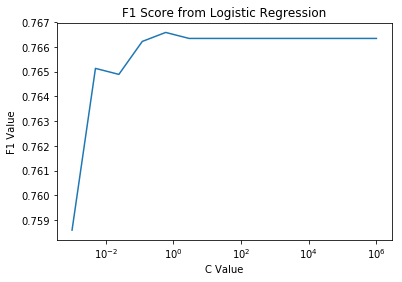

In [0]:

#hyperparamter tuning for C value using F1 score as metric
#cross validation with pipeline and column trnasformer
score_list = []
#step_list = ('model',model)
#pipe = Pipeline([('scaler',std_scaler),('model',model)])
for value in np.logspace(-3,10,14):
  model = LogisticRegression(solver = 'liblinear',C = value,max_iter = 1000)
  std_scaler = StandardScaler()
  transformer = ColumnTransformer([('scaler',scaler,numerical_columns)],remainder = 'passthrough')
  pipe = Pipeline([('transformer',transformer),('model',model)])
  score = cross_val_score(pipe,x_train,y_train,cv = 5,scoring = 'accuracy')
  score_list.append(np.mean(score))
  
plt.plot(np.logspace(-3,6,14),score_list)
plt.xscale('log')
plt.ylabel('F1 Value')
plt.xlabel('C Value')
plt.title('F1 Score from Logistic Regression')

In [0]:
#tuning for C value, penalty
from sklearn.model_selection import GridSearchCV
mod = LogisticRegression(max_iter = 1000)
parameters = {'C':[1, 10],'penalty':('l1', 'l2', 'elasticnet','none')}
clf = GridSearchCV(mod, parameters, cv=5)
clf.fit(x, y)

ValueError: ignored

In [0]:
from sklearn.compose import ColumnTransformer

In [0]:
scaler = StandardScaler()

In [0]:
numerical_columns = ['tenure','MonthlyCharges','TotalCharges']

In [0]:
transformer = ColumnTransformer([('scaler',scaler,numerical_columns)],remainder = 'passthrough')
transformer.fit(x_train)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('scaler',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges'])],
                  verbose=False)

In [0]:
#scaled input
x_train_scale = transformer.transform(x_train)
x_test_scale = transformer.transform(x_test)

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [0]:
#calcultaing AUC score
y_pred_test_proba = log_model.predict_proba(x_test_scale)[:,1]
fpr_test,tpr_test,thresholds_test = roc_curve(y_test,y_pred_test_proba)
roc_auc_score(y_test,y_pred_test_proba)

0.8319545894570096

In [0]:
#defining paramter grid for tuning
tuned_parameters = [{'model__penalty': ['l1'], 'model__solver': ['liblinear', 'saga'],
                     'model__C': [10e-2, 10e-1,1, 10, 100, 1000], 'model__max_iter': [1000]},
                    {'model__penalty': ['l2'], 'model__solver': ['liblinear','newton-cg', 'lbfgs', 'sag','saga'],
                     'model__C': [10e-2, 10e-1,1, 10, 100, 1000], 'model__max_iter': [1000]},
                    {'model__penalty': ['elasticnet'], 'model__solver': ['saga'],'model__l1_ratio' : [0, 0.25, 0.5, 0.75, 1],
                     'model__C': [10e-2, 10e-1,1, 10, 100, 1000], 'model__max_iter': [1000]},
                    {'model__penalty': ['none'], 'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
                     'model__C': [10e-2, 10e-1,1, 10, 100, 1000], 'model__max_iter': [1000]}]

scores = ['precision', 'recall','f1']

score_list = []

#loop to prit out parameters and performance to see best settings
for score in scores:
    print("\n\n# Tuning hyper-parameters for %s\n" % score)
    print()
    log_model = LogisticRegression()
    my_pipe = Pipeline([('scaler', std_scaler), ('model', log_model)])
    
    clf = GridSearchCV(my_pipe,tuned_parameters, cv=5, scoring='%s_macro' % score)
    clf.fit(x_train,y_train)
    print('\n\n')
    print("Best parameters set found on development set:\n")
    print()
    print(clf.best_params_)
    score_list.append((score,clf.best_score_, clf.best_params_))





# Tuning hyper-parameters for precision




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_r




Best parameters set found on development set:


{'model__C': 1.0, 'model__max_iter': 1000, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


# Tuning hyper-parameters for recall




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_r




Best parameters set found on development set:


{'model__C': 1.0, 'model__max_iter': 1000, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


# Tuning hyper-parameters for f1




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_r




Best parameters set found on development set:


{'model__C': 1.0, 'model__max_iter': 1000, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


Text(0.5, 1.0, 'F1 Score from Logistic Regression')

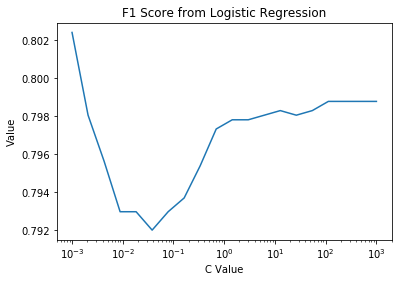

In [0]:
#This was to get values for graphing C
invAlphas = np.logspace(-3,3,20)
model_scores = {}
for metric,score, param in score_list:
  scores_list = []
  for c_num in invAlphas:
    log_model = LogisticRegression(C=c_num, solver=param['model__solver'], 
                                   penalty=param['model__penalty'], max_iter=param['model__max_iter'],
                                   l1_ratio= param['model__l1_ratio'] if 'model__l1_ratio' in param else None )
    my_pipe = Pipeline([('scaler', std_scaler), ('model', log_model)])
    # put into cross validation
    score = cross_val_score(my_pipe,x_train, y_train, cv=5, scoring=metric)
    #Append to list
    scores_list.append(score.mean())
  model_scores[metric] = scores_list

plt.plot(np.logspace(-3,3,20),model_scores['recall'])
plt.xscale('log')
plt.ylabel('Value')
plt.xlabel('C Value')
plt.title('F1 Score from Logistic Regression')
#model_scores

##Random Forest Model

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_scale, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(x_test_scale))))

Random Forest Accuracy: 0.773


In [0]:
recall_score(y_test, rf.predict(x_test_scale))

0.5106951871657754

##Logistic Regression

In [0]:
log_model = LogisticRegression(C = 0.0007,solver='liblinear',max_iter = 1000)
log_model.fit(x_train_scale,y_train)
y_pred_log = log_model.predict(x_test_scale)


In [0]:
accuracy_score(y_test,y_pred_log)

0.7320540156361052

In [0]:
recall_score(y_test,y_pred_log)

0.8021390374331551

##Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_scale,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_pred_train_dt = dt_model.predict(x_train_scale)
y_pred_test_dt = dt_model.predict(x_test_scale)

In [0]:
accuracy_score(y_test,y_pred_test_dt)

0.7192608386638237

In [0]:
dt_model.score(x_test_scale,y_test)

0.7192608386638237

In [0]:
recall_score(y_test,y_pred_test_dt)

0.4786096256684492

##Linear Support Vector Machine

In [0]:
from sklearn.svm import LinearSVC
linear_svc_model = LinearSVC(C = 10)
linear_svc_model.fit(x_train_scale,y_train)
print(linear_svc_model.score(x_test_scale,y_test))
y_pred_linsvc_model_test = linear_svc_model.predict(x_test_scale)

0.7270788912579957


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
recall_score(y_test,y_pred_linsvc_model_test)

0.8074866310160428

##SVC

In [0]:
from sklearn.svm import SVC
svc_model = SVC(kernel = 'poly')
svc_model.fit(x_train_scale,y_train)
svc_model.score(x_test_scale,y_test)
y_pred_svc_test = svc_model.predict(x_test_scale)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
recall_score(y_test,y_pred_svc_test)

0.786096256684492

##Naive - Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
gaussnb_model = GaussianNB()
gaussnb_model.fit(x_train_scale,y_train)
gaussnb_model.score(x_test_scale,y_test)
y_pred_nb_test = gaussnb_model.predict(x_test_scale)

In [0]:
recall_score(y_test,y_pred_nb_test)

0.7994652406417112

In [0]:
from pylab import rcParams

In [0]:
#creating Pie Chart
# Data to plot
sizes = df['churn_yes'].value_counts(sort = True)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

NameError: ignored

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
confusion_matrix(y_test,y_pred_linsvc_model_test)

array([[728, 305],
       [ 76, 298]])

In [0]:
# To get the weights of all the variables
weights = pd.Series(log_model.coef_[0],
 index=x.columns.values)
weights.sort_values(ascending = False)



MonthlyCharges                         0.294575
contract_Month-to-month                0.220075
IntService_Fiber optic                 0.172372
PayMethod_Electronic check             0.152617
paperless_yes                          0.096757
Internet_yes                           0.091796
SeniorCitizen                          0.089453
movies_yes                             0.046638
tv_yes                                 0.045794
multiplelines_yes                      0.015618
gender_Female                         -0.025745
gender_Male                           -0.041111
devprotect_yes                        -0.042014
onlinebackup_yes                      -0.048736
PayMethod_Bank transfer (automatic)   -0.064995
PayMethod_Credit card (automatic)     -0.075030
partner_yes                           -0.076951
PayMethod_Mailed check                -0.079448
IntService_DSL                        -0.080576
phoneservice_yes                      -0.094301
dependents_yes                        -0

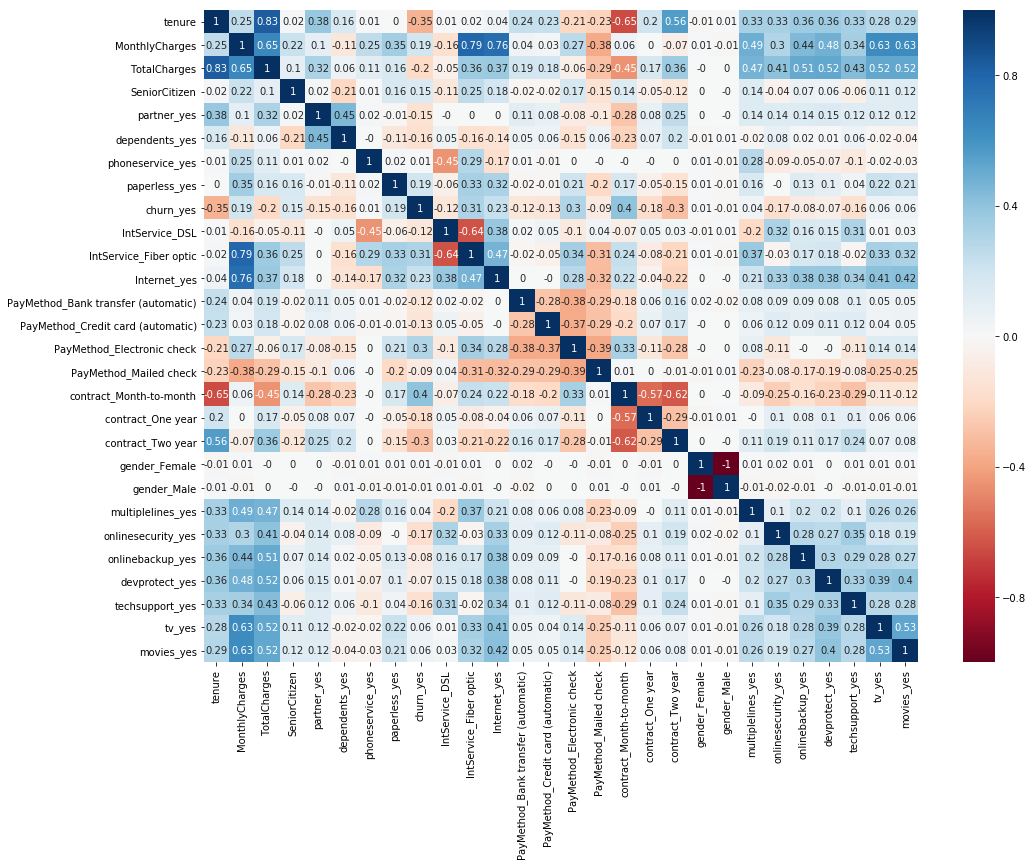

In [0]:
plt.figure(figsize = (16,12))
sns.heatmap(df.corr().round(2),vmin = -1,vmax = 1,cmap = 'RdBu',annot = True)

<BarContainer object of 2 artists>

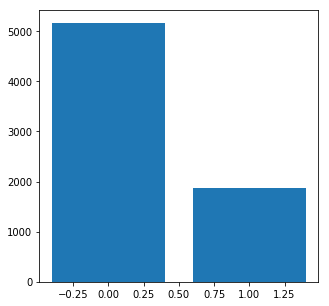

In [0]:
plt.bar([0,1],y.value_counts())

##Applying model to get customer List

In [0]:
new_df = df[df['churn_yes'] == 0]

In [0]:
new_df['contract_Month-to-month'].value_counts()

0    2943
1    2220
Name: contract_Month-to-month, dtype: int64

In [0]:
#taking only customers that provide above the average value to company
new_df2 = new_df[(new_df['MonthlyCharges']) > (new_df['MonthlyCharges'].mean())]

In [0]:
x_input = new_df2[['tenure', 'MonthlyCharges',
       'TotalCharges','SeniorCitizen', 'partner_yes', 'dependents_yes', 'phoneservice_yes',
       'paperless_yes','IntService_DSL',
       'IntService_Fiber optic', 'Internet_yes',
       'PayMethod_Bank transfer (automatic)',
       'PayMethod_Credit card (automatic)', 'PayMethod_Electronic check',
       'PayMethod_Mailed check', 'contract_Month-to-month',
       'contract_One year', 'contract_Two year', 'gender_Female',
       'gender_Male', 'multiplelines_yes', 'onlinesecurity_yes',
       'onlinebackup_yes', 'devprotect_yes', 'techsupport_yes', 'tv_yes',
       'movies_yes']]

In [0]:
transformer = ColumnTransformer([('scaler',scaler,numerical_columns)],remainder = 'passthrough')
transformer.fit(x_input)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('scaler',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges'])],
                  verbose=False)

In [0]:
x_input_scale = transformer.transform(x_input)

In [0]:
y_output = log_model.predict(x_input_scale)

In [0]:
type(y_output)

numpy.ndarray

In [0]:
#getting probabilties of each classification Churn or No Churn
prediction_of_prob = log_model.predict_proba(x_input_scale)

In [0]:
#adding probabilities as columns to data frame
new_df2['prob_0'] = prediction_of_prob[:,0] 
new_df2['prob_1'] = prediction_of_prob[:,1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
#ranking customer list based on probability to leave also based on above average spending and still have not left yet
new_df3 = new_df2.sort_values(by = 'prob_1',ascending = False)

In [0]:
#only the ones predicted to leave based on probability
new_df4 = new_df3[new_df3['prob_1']>0.5]

In [0]:
#customer list
new_df4

,customerID,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,partner_yes,dependents_yes,phoneservice_yes,paperless_yes,churn_yes,IntService_DSL,IntService_Fiber optic,Internet_yes,PayMethod_Bank transfer (automatic),PayMethod_Credit card (automatic),PayMethod_Electronic check,PayMethod_Mailed check,contract_Month-to-month,contract_One year,contract_Two year,gender_Female,gender_Male,multiplelines_yes,onlinesecurity_yes,onlinebackup_yes,devprotect_yes,techsupport_yes,tv_yes,movies_yes,prob_0,prob_1
3154,5150-ITWWB,3,94.85,335.75,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0.143926,0.856074
1714,2081-VEYEH,3,107.95,318.60,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,1,1,1,1,0.150195,0.849805
1563,3292-PBZEJ,11,111.40,1183.05,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,1,0,1,1,1,1,1,0.151830,0.848170
4610,6350-XFYGW,4,94.75,422.40,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,1,0.154277,0.845723
2382,6734-GMPVK,5,105.30,550.60,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,1,0,1,1,0,1,1,0.158325,0.841675
2233,1393-IMKZG,1,95.85,95.85,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,1,0.162234,0.837766
1898,3318-NMQXL,3,92.00,266.80,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0.164498,0.835502
5132,7577-SWIFR,1,89.25,89.25,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0.166076,0.833924
293,4847-TAJYI,6,89.35,567.80,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0.166924,0.833076
4032,8161-QYMTT,7,94.10,701.30,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0.169487,0.830513


In [0]:
new_df4['contract_Month-to-month'].value_counts()

1    1006
0     191
Name: contract_Month-to-month, dtype: int64

checking to see results if all customers with month-to-month contract chnge to 2 year contracts

###Applying change to month-to-month contracts to 2 year - contracts

In [0]:
change_df = new_df

In [0]:
change_df['contract_Month-to-month'].value_counts()

0    2943
1    2220
Name: contract_Month-to-month, dtype: int64

In [0]:
change_df['contract_Month-to-month'].dtypes

dtype('int64')

In [0]:
change_df.loc[change_df['contract_Month-to-month'] == 1,'contract_Two year'] = 1
change_df.loc[change_df['contract_Month-to-month'] == 1,'contract_Month-to-month'] = 0
  #change_df.loc[['contract_Month-to-month']]= 0
#change_df.loc[change_df['contract_Two year']==0] = 1
#change_df.loc[change_df['contract_One year'] == 1] = 0



/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [0]:
change_df['contract_Two year'].value_counts()

1    3857
0    1306
Name: contract_Two year, dtype: int64

In [0]:
change_df2 = change_df[(change_df['MonthlyCharges']) > (change_df['MonthlyCharges'].mean())]

In [0]:
x_2yearcontract = change_df2[['tenure', 'MonthlyCharges',
       'TotalCharges','SeniorCitizen', 'partner_yes', 'dependents_yes', 'phoneservice_yes',
       'paperless_yes','IntService_DSL',
       'IntService_Fiber optic', 'Internet_yes',
       'PayMethod_Bank transfer (automatic)',
       'PayMethod_Credit card (automatic)', 'PayMethod_Electronic check',
       'PayMethod_Mailed check', 'contract_Month-to-month',
       'contract_One year', 'contract_Two year', 'gender_Female',
       'gender_Male', 'multiplelines_yes', 'onlinesecurity_yes',
       'onlinebackup_yes', 'devprotect_yes', 'techsupport_yes', 'tv_yes',
       'movies_yes']]

In [0]:
transformer = ColumnTransformer([('scaler',scaler,numerical_columns)],remainder = 'passthrough')
transformer.fit(x_2yearcontract)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('scaler',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges'])],
                  verbose=False)

In [0]:
x_2yearcontract_scale = transformer.transform(x_2yearcontract)

In [0]:
prediction_of_prob_2year = log_model.predict_proba(x_2yearcontract_scale)

In [0]:
change_df2['prob_0'] = prediction_of_prob_2year[:,0] 
change_df2['prob_1'] = prediction_of_prob_2year[:,1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
change_df3 = change_df2.sort_values(by = 'prob_1',ascending = False)

In [0]:
change_df4 = change_df3[change_df3['prob_1']>0.5]

###Checking to see number of at-risk customers if they switch payment methods from electronic check to mailed check

then run this input back through models

In [0]:
paymethod_df = new_df
paymethod_df.loc[paymethod_df['PayMethod_Electronic check'] == 1,'PayMethod_Mailed check'] = 1
paymethod_df.loc[paymethod_df['PayMethod_Electronic check'] == 1,'PayMethod_Electronic check'] = 0
paymethod_df2 = paymethod_df[(paymethod_df['MonthlyCharges']) > (paymethod_df['MonthlyCharges'].mean())]
x_paymethod = change_df2[['tenure', 'MonthlyCharges',
       'TotalCharges','SeniorCitizen', 'partner_yes', 'dependents_yes', 'phoneservice_yes',
       'paperless_yes','IntService_DSL',
       'IntService_Fiber optic', 'Internet_yes',
       'PayMethod_Bank transfer (automatic)',
       'PayMethod_Credit card (automatic)', 'PayMethod_Electronic check',
       'PayMethod_Mailed check', 'contract_Month-to-month',
       'contract_One year', 'contract_Two year', 'gender_Female',
       'gender_Male', 'multiplelines_yes', 'onlinesecurity_yes',
       'onlinebackup_yes', 'devprotect_yes', 'techsupport_yes', 'tv_yes',
       'movies_yes']]


In [0]:
new_df4['PayMethod_Mailed check'].value_counts()

0    1068
1     129
Name: PayMethod_Mailed check, dtype: int64

In [0]:
new_df4['PayMethod_Electronic check'].value_counts()

1    646
0    551
Name: PayMethod_Electronic check, dtype: int64

In [0]:
new_df4['PayMethod_Bank transfer (automatic)'].value_counts()

0    979
1    218
Name: PayMethod_Bank transfer (automatic), dtype: int64

In [0]:
new_df4['PayMethod_Credit card (automatic)'].value_counts()

0    993
1    204
Name: PayMethod_Credit card (automatic), dtype: int64

In [0]:
new_df4['SeniorCitizen'].value_counts()

0    894
1    303
Name: SeniorCitizen, dtype: int64

In [0]:
new_df4['dependents_yes'].value_counts()

0    985
1    212
Name: dependents_yes, dtype: int64

In [0]:
new_df4['partner_yes'].value_counts()

0    706
1    491
Name: partner_yes, dtype: int64

##Survival Analysis

In [0]:
pip install --upgrade --no-deps git+https://github.com/CamDavidsonPilon/lifelines.git

  Cloning https://github.com/CamDavidsonPilon/lifelines.git to /tmp/pip-req-build-bqt_nyw8
  Running command git clone -q https://github.com/CamDavidsonPilon/lifelines.git /tmp/pip-req-build-bqt_nyw8
  Stored in directory: /tmp/pip-ephem-wheel-cache-w6j0ue8d/wheels/41/83/f4/afa85f556383ea2b102b278a2437649a1952beb99fab11b9b4
Successfully built lifelines


In [0]:
pip install lifelines

In [0]:
from lifelines import CoxPHFitter

In [0]:
x_cox = df[['tenure', 'MonthlyCharges',
       'TotalCharges','SeniorCitizen', 'partner_yes', 'dependents_yes', 'phoneservice_yes',
       'paperless_yes','IntService_DSL',
       'IntService_Fiber optic',
       'PayMethod_Bank transfer (automatic)',
       'PayMethod_Credit card (automatic)', 'PayMethod_Electronic check',
       'contract_One year', 'contract_Two year', 'gender_Female',
       'multiplelines_yes', 'onlinesecurity_yes',
       'onlinebackup_yes', 'devprotect_yes', 'techsupport_yes', 'tv_yes',
       'movies_yes','churn_yes']]

In [0]:
transformer = ColumnTransformer([('scaler',scaler,numerical_columns)],remainder = 'passthrough')
transformer.fit(x_cox)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('scaler',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges'])],
                  verbose=False)

In [0]:
x_cox_scale = transformer.transform(x_cox)

In [0]:

cph = CoxPHFitter(penalizer = 0.1)

cph_train, cph_test = train_test_split(x_cox, test_size=0.2)
cph.fit(cph_train, 'tenure', 'churn_yes')

<lifelines.CoxPHFitter: fitted with 5625 observations, 4119 censored>

In [0]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 5625 observations, 4119 censored>
      duration col = 'tenure'
         event col = 'churn_yes'
         penalizer = 0.1
number of subjects = 5625
  number of events = 1506
partial log-likelihood = -9827.13
  time fit was run = 2019-06-24 17:50:43 UTC

---
                                     coef exp(coef)  se(coef)      z      p  -log2(p)  lower 0.95  upper 0.95
MonthlyCharges                       0.02      1.02      0.02   0.77   0.44      1.19       -0.03        0.07
TotalCharges                        -0.00      1.00      0.00 -35.30 <0.005    904.45       -0.00       -0.00
SeniorCitizen                        0.04      1.04      0.06   0.63   0.53      0.92       -0.08        0.16
partner_yes                         -0.19      0.83      0.06  -3.08 <0.005      8.92       -0.31       -0.07
dependents_yes                      -0.08      0.92      0.08  -1.01   0.31      1.67       -0.23        0.07
phoneservice_yes                     0.77     

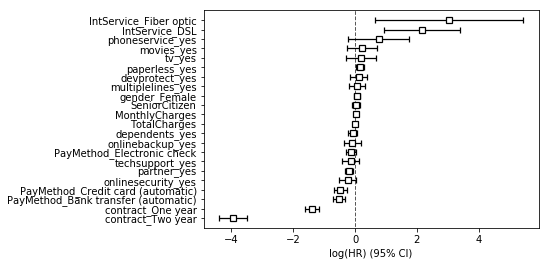

In [0]:
cph.plot()

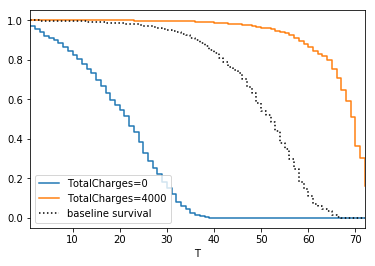

In [0]:
cph.plot_covariate_groups('TotalCharges', [0,4000])


In [0]:
censored_subjects = df.loc[df['churn_yes'] == 0]

In [0]:
unconditioned_sf = cph.predict_survival_function(censored_subjects)

In [0]:
conditioned_sf = unconditioned_sf.apply(lambda c: (c / c.loc[df.loc[c.name, 'tenure']]).clip_upper(1))

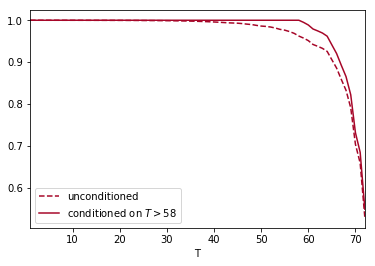

In [0]:
subject = 12
unconditioned_sf[subject].plot(ls="--", color="#A60628", label="unconditioned")
conditioned_sf[subject].plot(color="#A60628", label="conditioned on $T>58$")
plt.legend()

In [0]:
from lifelines.utils import median_survival_times, qth_survival_times

predictions_50 = median_survival_times(conditioned_sf)
# This is the same, but you can change the fraction to get other %tiles. 
# predictions_50 = qth_survival_times(.50, conditioned_sf)

In [0]:
values = predictions_50.T.join(df[['MonthlyCharges','tenure']])
values['RemainingValue'] = values['MonthlyCharges'] * (values[0.5] - values['tenure'])

In [0]:
values

,0.5,MonthlyCharges,tenure,RemainingValue
0,23.0,29.85,1,656.70
1,49.0,56.95,34,854.25
3,61.0,42.30,45,676.80
6,30.0,89.10,22,712.80
7,28.0,29.75,10,535.50
9,70.0,56.15,62,449.20
10,25.0,49.95,13,599.40
11,70.0,18.95,16,1023.30
12,inf,100.35,58,inf
14,34.0,105.50,25,949.50


In [0]:
upgrades = ['PayMethod_Credit card (automatic)',
     'PayMethod_Bank transfer (automatic)',
     'contract_One year',
     'contract_Two year']

results_dict = {}
for customer in values.index:
    actual = df.loc[[customer]]
    change = df.loc[[customer]]
    results_dict[customer] = [cph.predict_median(actual)]
    for upgrade in upgrades: 
        change[upgrade] = 1 if list(change[upgrade]) == [0] else 0
        results_dict[customer].append(cph.predict_median(change))
        change[upgrade] = 1 if list(change[upgrade]) == [0] else 0

results_df = pd.DataFrame(results_dict).T
results_df.columns = ['baseline'] + upgrades
actions = values.join(results_df).drop([0.5], axis=1)

In [0]:
actions

,MonthlyCharges,tenure,RemainingValue,baseline,PayMethod_Credit card (automatic),PayMethod_Bank transfer (automatic),contract_One year,contract_Two year
0,29.85,1,656.70,23.0,27.0,27.0,35.0,55.0
1,56.95,34,854.25,48.0,52.0,52.0,36.0,72.0
3,42.30,45,676.80,60.0,64.0,57.0,49.0,inf
6,89.10,22,712.80,25.0,22.0,30.0,37.0,58.0
7,29.75,10,535.50,26.0,31.0,31.0,38.0,58.0
9,56.15,62,449.20,70.0,72.0,68.0,63.0,inf
10,49.95,13,599.40,22.0,26.0,26.0,34.0,54.0
11,18.95,16,1023.30,70.0,68.0,72.0,inf,42.0
12,100.35,58,inf,inf,72.0,inf,68.0,inf
14,105.50,25,949.50,30.0,34.0,34.0,40.0,61.0


In [0]:
actions['CreditCard Diff'] = (
    actions['PayMethod_Credit card (automatic)'] - actions['baseline']) * actions['MonthlyCharges']

actions['BankTransfer Diff'] = (
    actions['PayMethod_Bank transfer (automatic)'] - actions['baseline']) * actions['MonthlyCharges']

actions['1yrContract Diff'] = (
    actions['contract_One year'] - actions['baseline']) * actions['MonthlyCharges']

actions['2yrContract Diff'] = (
    actions['contract_Two year'] - actions['baseline']) * actions['MonthlyCharges']

In [0]:
actions

,MonthlyCharges,tenure,RemainingValue,baseline,PayMethod_Credit card (automatic),PayMethod_Bank transfer (automatic),contract_One year,contract_Two year,CreditCard Diff,BankTransfer Diff,1yrContract Diff,2yrContract Diff
0,29.85,1,656.70,23.0,27.0,27.0,35.0,55.0,119.40,119.40,358.20,955.20
1,56.95,34,854.25,48.0,52.0,52.0,36.0,72.0,227.80,227.80,-683.40,1366.80
3,42.30,45,676.80,60.0,64.0,57.0,49.0,inf,169.20,-126.90,-465.30,inf
6,89.10,22,712.80,25.0,22.0,30.0,37.0,58.0,-267.30,445.50,1069.20,2940.30
7,29.75,10,535.50,26.0,31.0,31.0,38.0,58.0,148.75,148.75,357.00,952.00
9,56.15,62,449.20,70.0,72.0,68.0,63.0,inf,112.30,-112.30,-393.05,inf
10,49.95,13,599.40,22.0,26.0,26.0,34.0,54.0,199.80,199.80,599.40,1598.40
11,18.95,16,1023.30,70.0,68.0,72.0,inf,42.0,-37.90,37.90,inf,-530.60
12,100.35,58,inf,inf,72.0,inf,68.0,inf,-inf,NaN,-inf,NaN
14,105.50,25,949.50,30.0,34.0,34.0,40.0,61.0,422.00,422.00,1055.00,3270.50
